# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도
* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity) : 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율 사용
* 코사인 유사도(Cosine Similarity) : 벡터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 벡터 표현으로 활용 가능

Cosine Similarity sklearn에 있는거 사용

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity # 코사인 유사도

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#벡터표현사용, TF-IDF행렬 사용
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0],tfidf[1]))
print(cosine_similarity(tfidf[0],tfidf[2]))
print(cosine_similarity(tfidf[1],tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


Jaccard Similarity 만들기

In [5]:
def jaccard_similarity(d1,d2) : 
    lemmatizer = WordNetLemmatizer()
    
    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
    
    # 공통과 전체를 계산해야함
    # 전체 개수가 필요하니 length로 묶어야함
    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))
    
    return inter/union

In [6]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try not to become a man of success but rather try to become a man of value"
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.16666666666666666
0.06666666666666667
0.0625


## 한국어 형태소 분석기 설치

## 데이터 전처리
* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [7]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [8]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw : 
    reviews.append(i.split('\t')[1])
    
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [9]:
from konlpy.tag import Mecab

tagger = tagger = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성
* word2vec 생성에 필요한 라이브러리들을 추가

In [17]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* Word2Vec 모델을 생성
* gemsin의 Word2Vec은 선언과 동시에 학습을 해서 단어 벡터들을 생성

In [18]:
word2vec= Word2Vec(reviews, min_count=5)
word2vec

In [19]:
word2vec.wv.most_similar('영화')

[('작품', 0.96791011095047),
 ('마음', 0.9505764245986938),
 ('이야기', 0.9489017128944397),
 ('듯', 0.946643590927124),
 ('표현', 0.9343174695968628),
 ('내', 0.9332317113876343),
 ('모습', 0.9327036738395691),
 ('특징', 0.9310023784637451),
 ('잔잔', 0.9307295083999634),
 ('인간', 0.9297980666160583)]

* t-sne를 이용한 단어 벡터 시각화

t-SNE의 주요 목적은 Data Visualization으로 고차원 데이터(high-dimensional data)를 2차원 또는 3차원의 저차원 데이터로 시각화하여 데이터 분석 과정에서 활용하기 위한 방법이다.

In [20]:
tsne = TSNE(n_components=2) #2차원으로 만든다
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [23]:
vocab = word2vec.wv.vocab
vocab

{'어릴': <gensim.models.keyedvectors.Vocab at 0x27e0cfa3148>,
 '때': <gensim.models.keyedvectors.Vocab at 0x27e0cfa3108>,
 '보': <gensim.models.keyedvectors.Vocab at 0x27e0ced19c8>,
 '고': <gensim.models.keyedvectors.Vocab at 0x27e0d2905c8>,
 '지금': <gensim.models.keyedvectors.Vocab at 0x27e0d290548>,
 '다시': <gensim.models.keyedvectors.Vocab at 0x27e0d2907c8>,
 '봐도': <gensim.models.keyedvectors.Vocab at 0x27e0d290648>,
 '재밌': <gensim.models.keyedvectors.Vocab at 0x27e0d290688>,
 '어요': <gensim.models.keyedvectors.Vocab at 0x27e0d290a48>,
 'ㅋㅋ': <gensim.models.keyedvectors.Vocab at 0x27e0d290608>,
 '을': <gensim.models.keyedvectors.Vocab at 0x27e0d290708>,
 '배우': <gensim.models.keyedvectors.Vocab at 0x27e0d290848>,
 '는': <gensim.models.keyedvectors.Vocab at 0x27e0d290588>,
 '학생': <gensim.models.keyedvectors.Vocab at 0x27e0d290888>,
 '으로': <gensim.models.keyedvectors.Vocab at 0x27e0d290908>,
 ',': <gensim.models.keyedvectors.Vocab at 0x27e0d290948>,
 '외국': <gensim.models.keyedvectors.Vocab at 0x

In [21]:
similarity = word2vec.wv[vocab]
# 현재 word2vec에 들어가있는 vocab을 similariy를 뽑아냄
similarity

array([[-1.71942353e-01,  1.94724947e-02,  4.40167971e-02, ...,
         1.89901739e-01, -1.05016217e-01,  1.46715894e-01],
       [-4.43606079e-01,  6.14980655e-03,  3.49319935e-01, ...,
         3.38578165e-01, -2.20056653e-01,  3.61278564e-01],
       [-9.56841111e-02, -4.61313464e-02,  4.92543615e-02, ...,
         6.70949459e-01, -3.31132025e-01,  5.44278979e-01],
       ...,
       [-1.71681456e-02, -4.34457976e-03, -6.52201998e-04, ...,
         1.61134172e-02, -1.35502955e-02,  1.22665120e-02],
       [-3.07177417e-02, -2.42536366e-02,  4.69825405e-04, ...,
         1.67785957e-02, -1.66881029e-02,  6.25665905e-03],
       [-2.88583543e-02, -2.12889295e-02,  6.24877261e-03, ...,
         2.15260945e-02, -1.67331733e-02,  1.62167549e-02]], dtype=float32)

In [22]:
# 2차원으로 바꾸기
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) #2차원으로 변환
df = pd.DataFrame(transform_similarity , index=vocab, columns=['x','y'])
df[0:10]

,x,y
어릴,-27.223530,-13.003844
때,-50.700146,22.034077
보,-54.623310,16.526806
고,-54.273853,20.356823
지금,-52.482574,15.052136
다시,-53.905453,15.937573
봐도,-54.594772,14.466633
재밌,-65.267365,16.304285
어요,-64.271172,15.198121
ㅋㅋ,-65.868111,12.742626


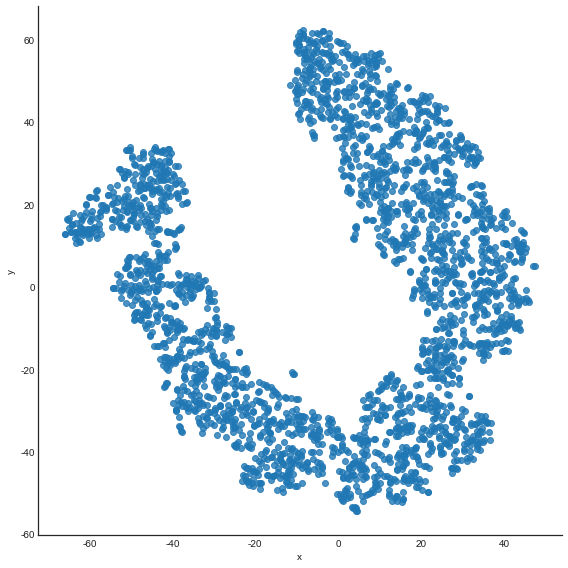

In [25]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x','y', data=df, fit_reg=False, height=8) 
#선형회귀 적합 선을 포함시키지 않으려면 fit_reg=False 를 설정해주면 됩니다. 

plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화
* 계층적 군집화란 개별 개체들을 